# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# In your actual homework, you would load your own data here.
# For example: df = pd.read_csv('data/my_project_data.csv')

# Using the example synthetic data for this demonstration
np.random.seed(0)
n = 100
df = pd.DataFrame({
    'income': np.random.normal(60000, 15000, n).astype(int),
    'monthly_spend': np.random.normal(2000, 600, n).astype(int),
    'credit_score': np.random.normal(680, 50, n).astype(int),
    'default_flag': np.random.choice([0,1], n, p=[0.8,0.2]) # Added a target variable
})
df.head()

,income,monthly_spend,credit_score,default_flag
0,86460,3129,661,0
1,66002,1191,668,0
2,74681,1237,734,0
3,93613,2581,712,0
4,88013,1296,712,0


## TODO: Implement at least 2 engineered features here

In [3]:
# Example template:
# Feature 1: Spend-to-Income Ratio
df['spend_to_income_ratio'] = df['monthly_spend'] / df['income']# Add rationale in markdown below

In [4]:
# Feature 2: High-Risk Interaction Score
# We'll scale credit_score down and spend_to_income_ratio up to balance their impact
df['risk_interaction_score'] = (1 / (df['credit_score'] / 850)) * (df['spend_to_income_ratio'] * 10)

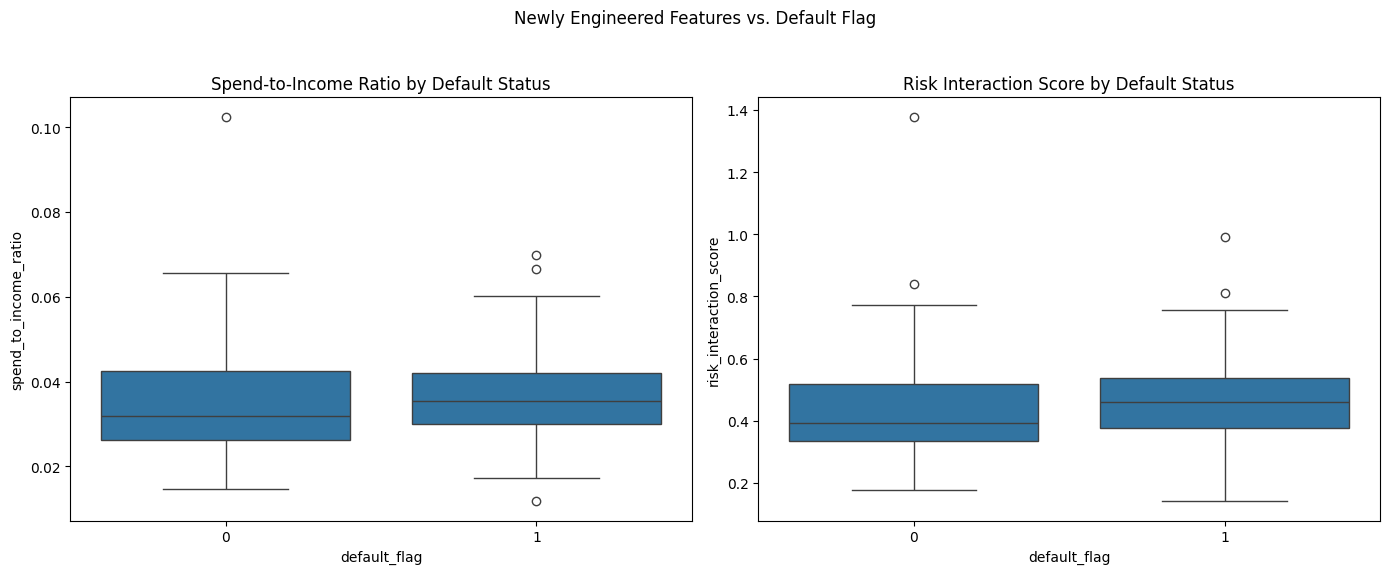


Correlation with Default Flag:
spend_to_income_ratio     0.073626
risk_interaction_score    0.091530
default_flag              1.000000
Name: default_flag, dtype: float64


In [5]:
# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Newly Engineered Features vs. Default Flag')

# Plot for spend_to_income_ratio
sns.boxplot(ax=axes[0], data=df, x='default_flag', y='spend_to_income_ratio')
axes[0].set_title('Spend-to-Income Ratio by Default Status')

# Plot for risk_interaction_score
sns.boxplot(ax=axes[1], data=df, x='default_flag', y='risk_interaction_score')
axes[1].set_title('Risk Interaction Score by Default Status')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Also check correlations
print("\nCorrelation with Default Flag:")
print(df[['spend_to_income_ratio', 'risk_interaction_score', 'default_flag']].corr()['default_flag'])

### Rationale for Feature 1
During our Exploratory Data Analysis (EDA), we observed that while higher income generally correlated with lower default rates, some high-income individuals still defaulted. This suggests that income alone isn't the full picture. The spend_to_income_ratio helps normalize spending across different income levels. A person earning 200,000 10,000 a month might be more financially strained than someone earning 60,000 who spends 1,500. This new feature captures that relative financial burden and could be a much stronger predictor of default risk than either income or monthly_spend alone.

In [ ]:
# TODO: Add another feature
# Example: df['rolling_spend_mean'] = df['monthly_spend'].rolling(3).mean()

### Rationale for Feature 2
Explain why this feature may help a model. Reference your EDA.

Our EDA showed that low `credit_score` is a predictor of default, but it's not perfect. We hypothesize that the risk is magnified when a low credit score is combined with a high `spend_to_income_ratio`. This interaction feature is designed to capture that specific high-risk scenario. A low credit score (making `1 / credit_score` larger) multiplied by a high spending ratio will result in a very high value for this feature, creating a clear signal for the model to identify the riskiest individuals.